# Analiza možnosti za nedeljski izlet
Podatki so zajeti s spletne strani [hribi.net](http://www.hribi.net/goreiskanjerezultat.asp?drzavaid=1&gorovjeid=&goraime=&VisinaMIN=&VisinaMAX=&CasMIN=&CasMAX=&izhodisce=&izhodisceMIN=&izhodisceMAX=&VisinskaRazlikaMIN=&VisinskaRazlikaMAX=&zahtevnostid=&zahtevnostSmucanjeid=&IzhodisceMinOddaljenost=&IzhodisceMAXOddaljenost=&GoraMinOddaljenost=&GoraMaxOddaljenost=&mojaSirina=0&mojaDolzina=0), kjer je trenutno 1704 možnosti za izbiro izleta po Sloveniji (*19. 12. 2018*).
### V spodnji analizi so zbrani naslednji podatki:
* ime izleta,
* nadmorska višina,
* mesto priljubljenosti,
* procent priljubljenosti,
* zahtevnost poti,
* čas hoje,
* število poti,
* vrsta izletniške točke,
* gorovje v katerem se nahaja in
* opis izletniške točke.

## Analiza podatkov
Podatki iz osnovne tabele so predstavljeni v popravljeni tabeli. Ta namesto mešanega stolpca 'Čas poti', vsebuje stolpec 'Čas poti v minutah'. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_rows = 15

In [3]:
izleti = pd.read_csv('../Prog1_projekt_izlet/Prog1_projekt_izlet/podatki_izlet/podatki_izletov.csv', index_col = 'id')
izleti.columns = ['Ime', 'Gorovje', 'Nadmorska višina v metrih', 'Vrsta', 'Priljubljenost v %', 
                  'Mesto priljubljenosti', 'Št. poti', 'Opis', 'Čas poti', 'Zahtevnost poti']
izleti = izleti[['Ime', 'Nadmorska višina v metrih', 'Mesto priljubljenosti', 'Priljubljenost v %', 
                 'Zahtevnost poti', 'Čas poti', 'Št. poti', 'Vrsta', 'Gorovje', 'Opis']]

Sprememba enot v stolpcu 'Čas poti'. Uporabili smo naslednjo funkcijo:

In [4]:
def v_minute(x):
    if x < 6:
        x = 60*x
    return x

In [5]:
izleti['Čas poti v min'] = izleti['Čas poti'].apply(v_minute)
izleti = izleti.drop(columns = 'Čas poti')

In [22]:
priljubljeni = izleti['Priljubljenost v %'] >= 80
priljubljeni_izleti = izleti[priljubljeni]

In [7]:
nizji = izleti['Nadmorska višina v metrih'] <= 1500
krajsi = izleti['Čas poti v min'] <= 30
druzinski = izleti[priljubljeni & nizji & krajsi]

In [8]:
visji = izleti['Nadmorska višina v metrih'] >= 1500
daljsi = izleti['Čas poti v min'] > 60
sportni = izleti[priljubljeni & visji & daljsi] 

In [9]:
visoki = izleti['Nadmorska višina v metrih'] >= 2000
dolgi = izleti['Čas poti v min'] >= 300
ekstremni = izleti[priljubljeni & visoki & dolgi]

In [10]:
zahtevnost = izleti.groupby('Zahtevnost poti')
zahtevnost.size().sort_values(ascending=False)

Zahtevnost poti
lahka označena pot                1047
lahka neoznačena steza             325
delno zahtevna označena pot         72
lahko brezpotje                     69
zahtevna označena pot               43
zelo zahtevna označena pot          35
delno zahtevna neoznačena pot       33
zahtevno brezpotje                  27
zahtevna neoznačena steza           24
zelo zahtevno brezpotje             12
izjemno zahtevna označena pot        7
zelo zahtevna neoznačena steza       5
alpinistični vzpon                   3
ni podatka                           2
dtype: int64

In [11]:
gorovje = izleti.groupby('Gorovje')
izleti_v_gorovju = gorovje.size().sort_values(ascending=False)
izleti_v_gorovju

Gorovje
Julijske Alpe                                    462
Goriško, Notranjsko in Snežniško hribovje        263
Kamniško Savinjske Alpe                          257
Karavanke                                        255
Zasavsko - Posavsko hribovje in Dolenjska        181
Škofjeloško, Cerkljansko hribovje in Jelovica    116
Pohorje in ostala severovzhodna Slovenija         92
Polhograjsko hribovje in Ljubljana                78
dtype: int64

Povprečni izlet ima naslednje lastnosti:

In [12]:
povprecni_izlet = izleti.mean()
povprecni_izlet

Nadmorska višina v metrih    1197.588615
Mesto priljubljenosti        1041.220070
Priljubljenost v %             59.075704
Št. poti                        3.225352
Čas poti v min                 88.449531
dtype: float64

Izleti v različnih gorovjih pa imajo take lastnosti:

In [13]:
gorovje.mean()

,Nadmorska višina v metrih,Mesto priljubljenosti,Priljubljenost v %,Št. poti,Čas poti v min
Gorovje,,,,,
"Goriško, Notranjsko in Snežniško hribovje",783.376426,1229.536122,51.646388,2.893536,67.053232
Julijske Alpe,1638.835498,832.134199,67.296537,2.831169,128.199134
Kamniško Savinjske Alpe,1430.891051,829.622568,67.392996,4.171206,98.739300
Karavanke,1335.329412,1150.521569,54.800000,3.333333,80.549020
Pohorje in ostala severovzhodna Slovenija,844.445652,1268.608696,50.119565,2.369565,70.750000
Polhograjsko hribovje in Ljubljana,644.192308,1036.743590,59.230769,3.961538,45.897436
Zasavsko - Posavsko hribovje in Dolenjska,695.348066,1194.353591,53.077348,2.895028,61.712707
"Škofjeloško, Cerkljansko hribovje in Jelovica",995.508621,1259.250000,50.508621,3.913793,57.586207


Zanima nas kako se število izletov spreminja z gorovji:

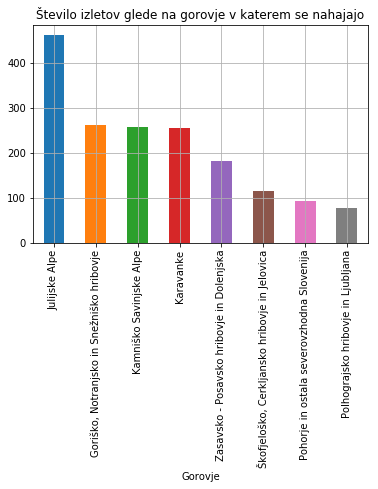

In [20]:
izleti_v_gorovju.plot.bar(title = 'Število izletov glede na gorovje v katerem se nahajajo', grid = True)

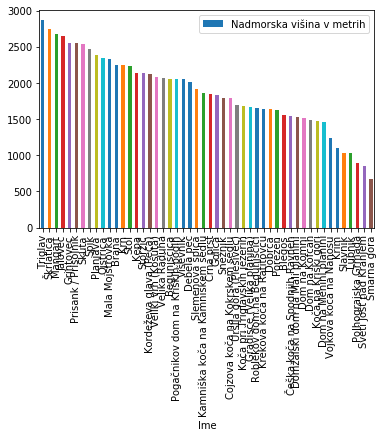

In [36]:
najbolj_priljubljeni = priljubljeni_izleti.sort_values('Priljubljenost v %', ascending = False).head(50)
najbolj_priljubljeni.sort_values('Nadmorska višina v metrih', ascending=False).plot.bar(x = 'Ime', y = 'Nadmorska višina v metrih')